In [286]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import imghdr
import numpy as np

In [287]:
data_dir = 'data'
#os.listdir(os.path.join('data', 'happy'))

In [288]:
image_exts = ['jpeg', 'png', 'bmp', 'j']

In [289]:
img = cv2.imread(os.path.join(data_dir, 'sad', 'Crying-girl.jpg'))
#plt.imshow(img)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [290]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
             print("Image not in extension list {}".format(image_path))

In [291]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [292]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].max()

np.float32(255.0)

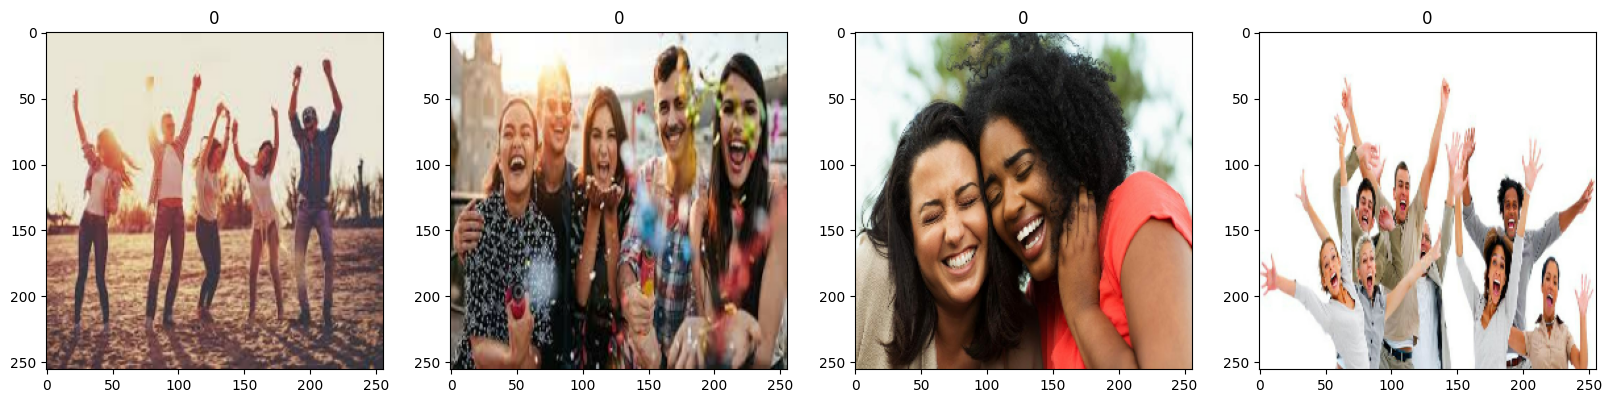

In [293]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling

In [294]:
data = data.map(lambda x, y : (x/255, y))

In [295]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [296]:
batch[0]

array([[[[0.7372549 , 0.7411765 , 0.75686276],
         [0.7941176 , 0.7980392 , 0.8137255 ],
         [0.827451  , 0.8392157 , 0.85882354],
         ...,
         [0.62712544, 0.61536074, 0.5957529 ],
         [0.6228784 , 0.61111367, 0.5915058 ],
         [0.61503524, 0.60327053, 0.5836627 ]],

        [[0.7411765 , 0.74509805, 0.7607843 ],
         [0.7921569 , 0.79607844, 0.8117647 ],
         [0.8254902 , 0.8372549 , 0.8568627 ],
         ...,
         [0.6313726 , 0.61960787, 0.6       ],
         [0.6215763 , 0.6098116 , 0.59020376],
         [0.61960787, 0.60784316, 0.5882353 ]],

        [[0.730373  , 0.74835324, 0.76011795],
         [0.78201973, 0.8       , 0.8117647 ],
         [0.8215686 , 0.84117645, 0.85294116],
         ...,
         [0.63529414, 0.62352943, 0.6039216 ],
         [0.62419575, 0.61243105, 0.5928232 ],
         [0.6219018 , 0.6101371 , 0.59052926]],

        ...,

        [[0.29215688, 0.27254903, 0.25686276],
         [0.29803923, 0.2784314 , 0.2627451 ]

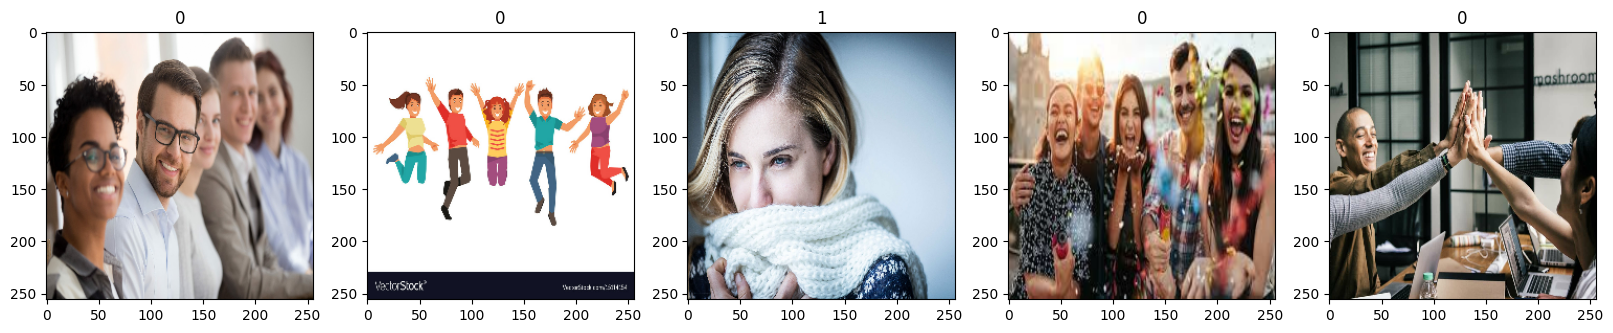

In [297]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [298]:
len(data)

6

In [299]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [300]:
test_size+train_size+val_size

6

In [301]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model

In [302]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [303]:
model = Sequential()

In [304]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ammar\PycharmProjects\JupyterProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [305]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [306]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.4766 - loss: 1.4980 - val_accuracy: 0.6562 - val_loss: 0.6720
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.6094 - loss: 0.6553 - val_accuracy: 0.5938 - val_loss: 0.6176
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.6719 - loss: 0.5739 - val_accuracy: 0.5938 - val_loss: 0.5849
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.6562 - loss: 0.5487 - val_accuracy: 0.9062 - val_loss: 0.4941
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.8203 - loss: 0.4978 - val_accuracy: 0.5625 - val_loss: 0.6081
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.7969 - loss: 0.4755 - val_accuracy: 0.9062 - val_loss: 0.3391
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.8281 - loss: 0.4003 - val_accuracy: 0.8125 - val_loss: 0.4140
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8750 - loss: 0.3269 - val_accuracy: 0.8750 - val_loss:

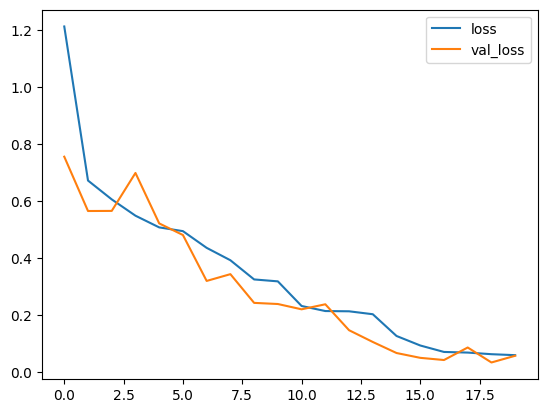

In [258]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

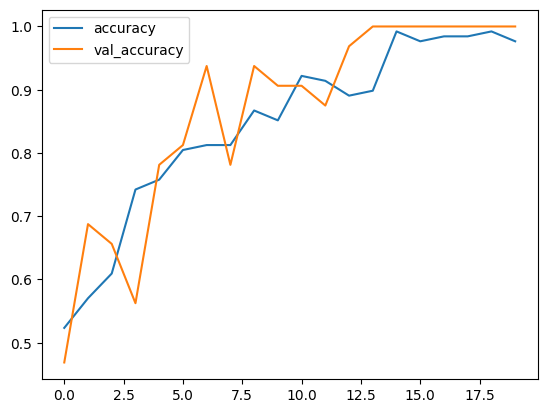

In [259]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [260]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [261]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [262]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [263]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


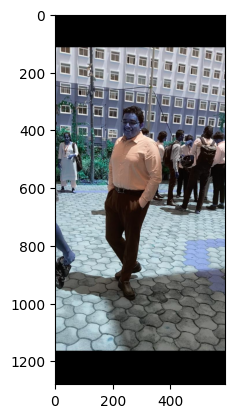

In [279]:
img = cv2.imread('img.png')
plt.imshow(img)
plt.show()

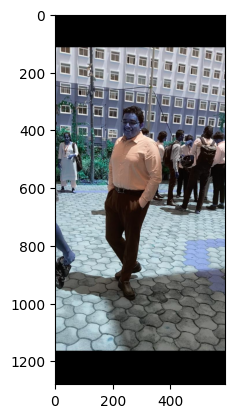

In [280]:
resize = tf.image.resize(img, (256,256))
plt.imshow(img)

In [281]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [282]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [283]:
yhat

array([[0.0225301]], dtype=float32)

In [284]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy
